In [3]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [5]:
api_key = ''
channel_ids = ['UC6SEUWgSEUOTKdwdRV7IRhA', #sisanbaniya
               'UCnvSIXKLV9hPmH2TPtjlzPw', #swagatgyawali
               'UCIUpvBA9ibPWHaDeH0G49Aw', #thenepalicomment
               'UCbs0xk6PavMVDt5UJqxGV6g', #galaxy4k
               'UCSslzCYfi-PA6q1atGYUqSg', #4kgamingnepal
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

# Function to get channel statistics

In [6]:
def get_channel_stats(youtube, channel_ids):
    
    all_data = []
    
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id= ','.join(channel_ids))
    response = request.execute()
    
    for i in range(len(response['items'])):
        
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    views = response['items'][i]['statistics']['viewCount'],
                    total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                   )
        all_data.append(data)
    
    return all_data

In [7]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [8]:
channel_data = pd.DataFrame(channel_statistics)

In [9]:
channel_data['subscribers'] = pd.to_numeric(channel_data['subscribers'])
channel_data['views'] = pd.to_numeric(channel_data['views'])
channel_data['total_videos'] = pd.to_numeric(channel_data['total_videos'])
channel_data.dtypes
channel_data

,channel_name,subscribers,views,total_videos,playlist_id
0,Sisan Baniya,645000,81625973,418,UU6SEUWgSEUOTKdwdRV7IRhA
1,Swagat Gyawali,131000,6152179,135,UUnvSIXKLV9hPmH2TPtjlzPw
2,4K Gaming Nepal,1070000,87294475,2864,UUSslzCYfi-PA6q1atGYUqSg
3,The Nepali Comment,124000,7943758,41,UUIUpvBA9ibPWHaDeH0G49Aw
4,Galaxy 4K,827000,148671632,7518,UUbs0xk6PavMVDt5UJqxGV6g


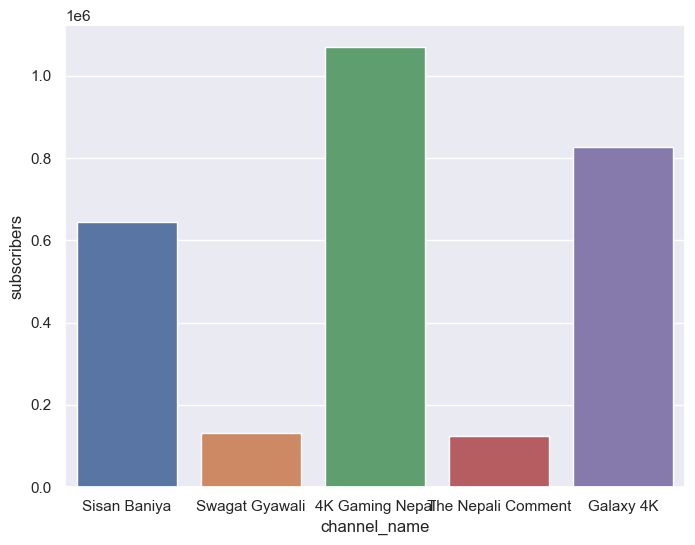

In [10]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x='channel_name', y='subscribers', data=channel_data)

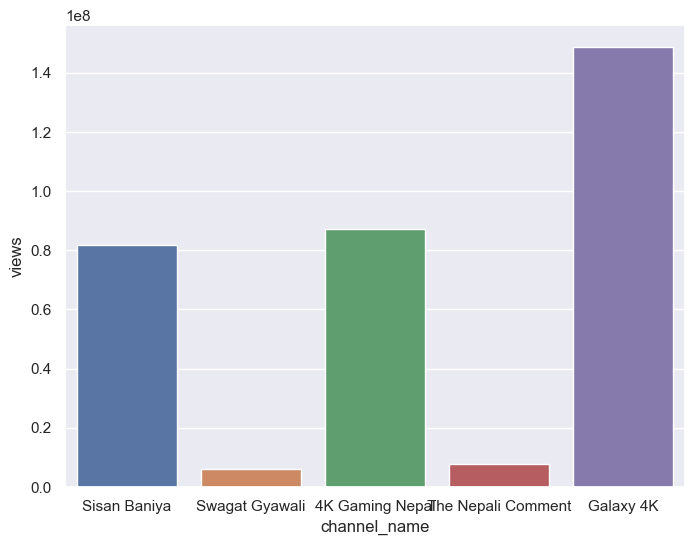

In [11]:
ax = sns.barplot(x='channel_name', y='views', data=channel_data)

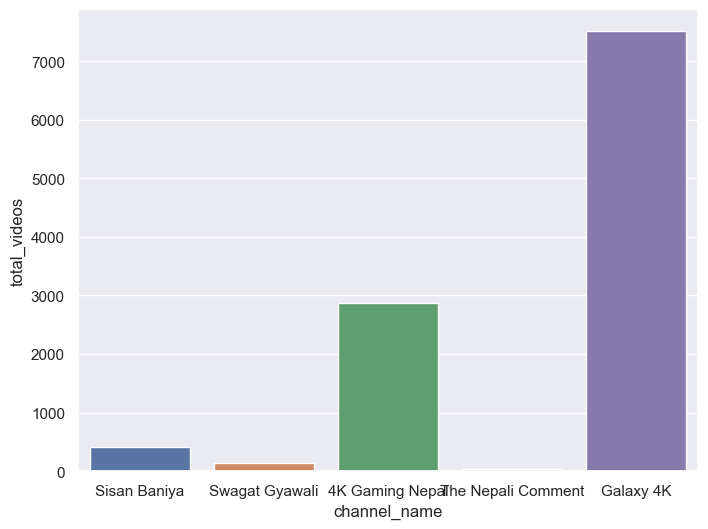

In [12]:
ax = sns.barplot(x='channel_name', y='total_videos', data=channel_data)

# Function to get Video ID

In [13]:
playlist_id = channel_data.loc[channel_data['channel_name']=='Sisan Baniya', 'playlist_id'].iloc[0]
playlist_id

'UU6SEUWgSEUOTKdwdRV7IRhA'

In [14]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token)
            response = request.execute()
        
        for i in range(len(response['items'])):
            video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
        next_page_token = response.get('nextPageToken')
        
    return video_ids

In [15]:
video_ids = get_video_ids(youtube, playlist_id)

# Function to get video details

In [16]:
def get_video_details(youtube, video_ids):
    
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):           
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(title = video['snippet']['title'],
                               published_date = video['snippet']['publishedAt'],
                               views = video['statistics']['viewCount'],
                               likes = video['statistics']['likeCount'])
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [17]:
video_details = get_video_details(youtube, video_ids)

In [23]:
video_data = pd.DataFrame(video_details)

In [19]:
video_data

,title,published_date,views,likes
0,| Photoshoot at our Place | ft. Sandook,2023-01-30T01:15:00Z,59311,3285
1,| Ghanta Bajak |,2023-01-29T01:15:10Z,66207,4792
2,| SAILUNG | Awesome Saturdays | Ride Vlog |,2023-01-28T01:15:00Z,111651,7082
3,| Made In Nepal Products | 2023,2023-01-27T01:15:00Z,120284,5290
4,| My Basic Saturday | Family VLog,2023-01-26T01:15:03Z,85764,4427
...,...,...,...,...
435,That friend,2015-09-10T03:10:53Z,72912,1517
436,| Overlooking The Old Gun |,2015-09-06T15:54:04Z,56017,1928
437,fashion photography - Behind the scenes with K...,2013-08-25T07:24:52Z,37992,735
438,professor eggie. nepali short. (talking egg an...,2012-01-12T16:53:14Z,29222,879


In [20]:
video_data['views'] = pd.to_numeric(video_data['views'])
video_data['likes'] = pd.to_numeric(video_data['likes'])
video_data

,title,published_date,views,likes
0,| Photoshoot at our Place | ft. Sandook,2023-01-30T01:15:00Z,59311,3285
1,| Ghanta Bajak |,2023-01-29T01:15:10Z,66207,4792
2,| SAILUNG | Awesome Saturdays | Ride Vlog |,2023-01-28T01:15:00Z,111651,7082
3,| Made In Nepal Products | 2023,2023-01-27T01:15:00Z,120284,5290
4,| My Basic Saturday | Family VLog,2023-01-26T01:15:03Z,85764,4427
...,...,...,...,...
435,That friend,2015-09-10T03:10:53Z,72912,1517
436,| Overlooking The Old Gun |,2015-09-06T15:54:04Z,56017,1928
437,fashion photography - Behind the scenes with K...,2013-08-25T07:24:52Z,37992,735
438,professor eggie. nepali short. (talking egg an...,2012-01-12T16:53:14Z,29222,879


In [21]:
top_10_videos = video_data.sort_values(by='views', ascending=False).head(10)
top_10_videos

,title,published_date,views,likes
266,| CHEPANG | ft. Miss Nepal 2018 Shrinkhala Kh...,2018-11-04T00:56:43Z,1389448,83002
264,| GOSAIKUNDA Vlog | Shrinkhala Khatiwada Intro...,2018-11-21T15:33:45Z,1319739,61950
198,| The Annapurna Experience | ABC Trek |,2019-12-05T13:15:18Z,1244941,34148
265,| Tihar Vlog 2018 | ft. Abin Bho & Shrinkhala ...,2018-11-13T06:38:35Z,1018787,35747
339,|| WEST NEPAL PROMO || #travelnepal,2017-07-21T15:44:03Z,789435,31636
326,| White house | Awesome Saturdays |,2017-10-13T09:05:46Z,770505,22975
80,| Lakuri Bhanjyang | RIDE VLOG,2021-07-25T14:24:19Z,763641,38910
271,"| Changa Vlog | ft. Shrinkhala Khatiwada, Mr. ...",2018-10-17T09:06:29Z,721264,20951
112,| Miss HARVARD 2021 |,2021-03-08T14:03:56Z,654431,46475
203,| JANAKPUR | CHHAT VLOG | Shrinkhala Birthday,2019-11-25T14:03:47Z,634761,27065


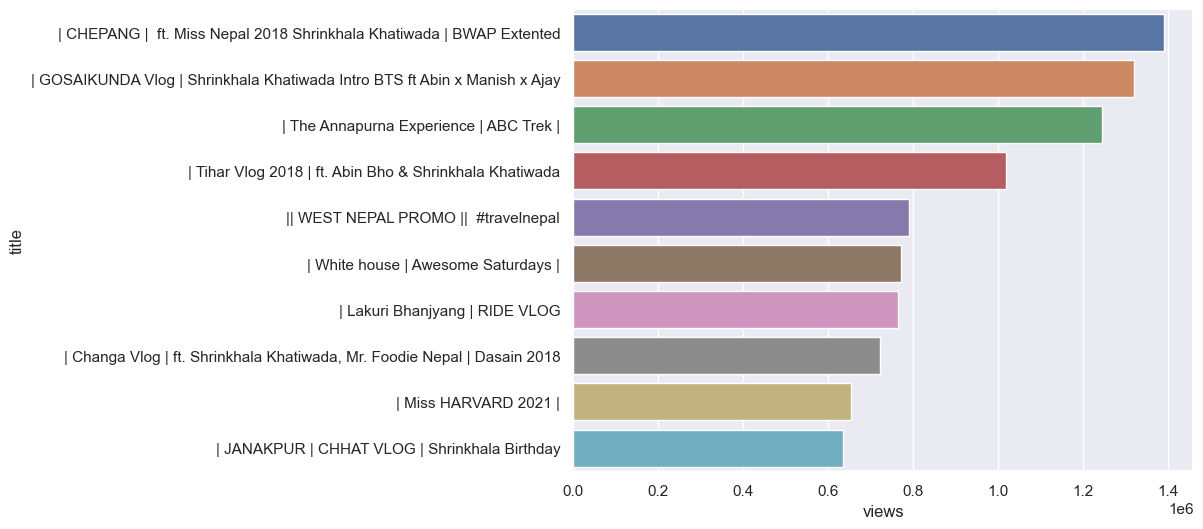

In [22]:
ax1 = sns.barplot(x='views', y='title', data=top_10_videos)

In [32]:
video_data['month'] = pd.to_datetime(video_data['published_date']).dt.strftime('%b')
video_data

,title,published_date,views,likes,month,year
0,| Photoshoot at our Place | ft. Sandook,2023-01-30T01:15:00Z,59311,3285,Jan,2023
1,| Ghanta Bajak |,2023-01-29T01:15:10Z,66207,4792,Jan,2023
2,| SAILUNG | Awesome Saturdays | Ride Vlog |,2023-01-28T01:15:00Z,111651,7082,Jan,2023
3,| Made In Nepal Products | 2023,2023-01-27T01:15:00Z,120284,5290,Jan,2023
4,| My Basic Saturday | Family VLog,2023-01-26T01:15:03Z,85764,4427,Jan,2023
...,...,...,...,...,...,...
435,That friend,2015-09-10T03:10:53Z,72912,1517,Sep,2015
436,| Overlooking The Old Gun |,2015-09-06T15:54:04Z,56017,1928,Sep,2015
437,fashion photography - Behind the scenes with K...,2013-08-25T07:24:52Z,37992,735,Aug,2013
438,professor eggie. nepali short. (talking egg an...,2012-01-12T16:53:14Z,29222,879,Jan,2012


In [33]:
video_data['year'] = pd.to_datetime(video_data['published_date']).dt.strftime('%Y')
video_data

,title,published_date,views,likes,month,year
0,| Photoshoot at our Place | ft. Sandook,2023-01-30T01:15:00Z,59311,3285,Jan,2023
1,| Ghanta Bajak |,2023-01-29T01:15:10Z,66207,4792,Jan,2023
2,| SAILUNG | Awesome Saturdays | Ride Vlog |,2023-01-28T01:15:00Z,111651,7082,Jan,2023
3,| Made In Nepal Products | 2023,2023-01-27T01:15:00Z,120284,5290,Jan,2023
4,| My Basic Saturday | Family VLog,2023-01-26T01:15:03Z,85764,4427,Jan,2023
...,...,...,...,...,...,...
435,That friend,2015-09-10T03:10:53Z,72912,1517,Sep,2015
436,| Overlooking The Old Gun |,2015-09-06T15:54:04Z,56017,1928,Sep,2015
437,fashion photography - Behind the scenes with K...,2013-08-25T07:24:52Z,37992,735,Aug,2013
438,professor eggie. nepali short. (talking egg an...,2012-01-12T16:53:14Z,29222,879,Jan,2012


In [34]:
videos_per_month_old = video_data.groupby('month').size()

In [35]:
videos_per_month_old.dtype

dtype('int64')

In [42]:
videos_per_month = video_data.groupby('month', as_index=False).size()

In [43]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [44]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['month'], categories = sort_order, ordered = True)
videos_per_month = videos_per_month.sort_index()

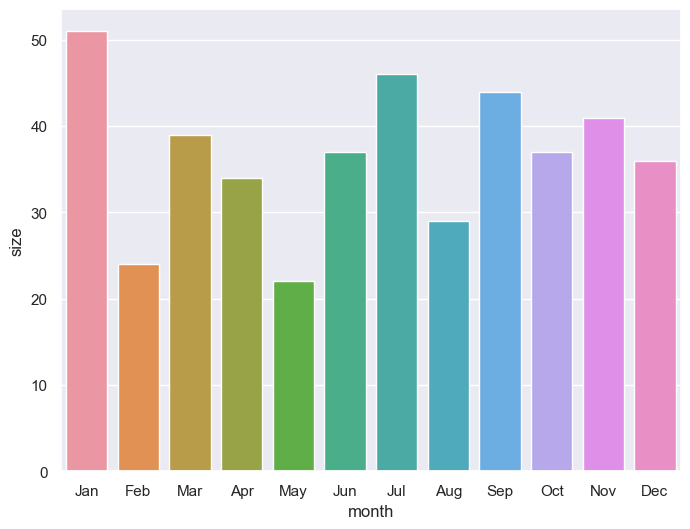

In [46]:
ax2 = sns.barplot(x='month', y='size', data=videos_per_month)

In [120]:
video_data.to_csv('Sisan Baniya All Video Details.csv')

In [47]:
videos_per_year = video_data.groupby('year', as_index=False).size()

In [48]:
videos_per_year

,year,size
0,2009,2
1,2012,2
2,2013,2
3,2015,10
4,2016,64
5,2017,48
6,2018,57
7,2019,64
8,2020,58
9,2021,84


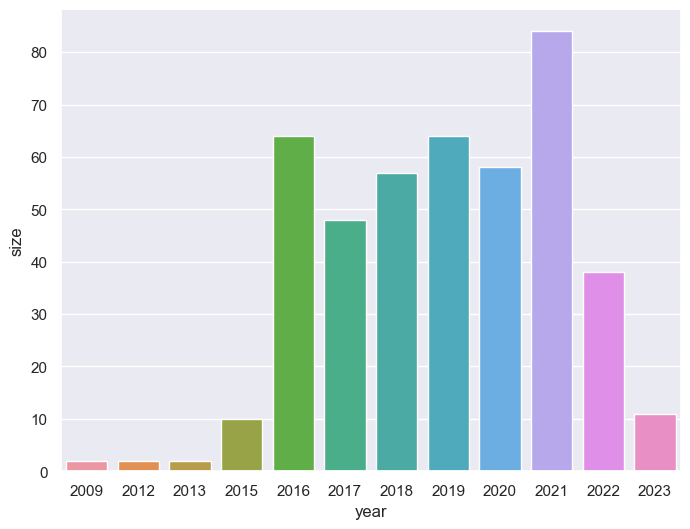

In [51]:
ax3 = sns.barplot(x='year', y='size', data=videos_per_year)